# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Ames Housing Data again!

We included the code to preprocess below.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ames = pd.read_csv('ames.csv')

# using 9 predictive categorical or continuous features, plus the target SalePrice
continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

In [47]:
X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']

### Perform a train-test split

In [48]:
# Split the data into training and test sets. Use the default split size

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1095 365 1095 365


### Apply your model to the train set

In [49]:
# Import and initialize the linear regression model class
from sklearn.linear_model import LinearRegression

In [50]:
# Fit the model to train data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### Calculate predictions on training and test sets

In [51]:
# Calculate predictions on training and test sets

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Calculate training and test residuals

In [52]:
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [53]:
# Import mean_squared_error from sklearn.metrics

from sklearn.metrics import mean_squared_error

In [54]:
# Calculate training and test MSE

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.16381957558327714
Test Mean Squared Error: 0.1604596207637731


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

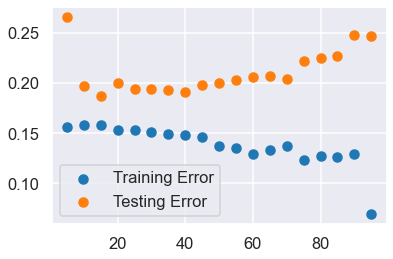

In [55]:
# Your code here

random.seed(110)
state = random.randint(1,1000)

train_err = []
test_err = []

sizes = list(range(5,100,5))

for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size/100, random_state=state)
    
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    
    train_err.append(train_mse)
    test_err.append(test_mse)

plt.scatter(sizes, train_err, label='Training Error')
plt.scatter(sizes, test_err, label='Testing Error')
plt.legend();

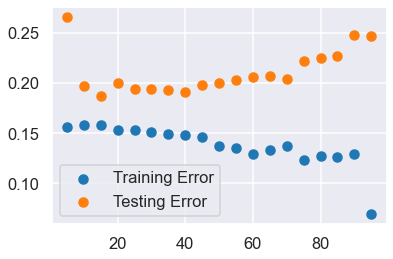

In [56]:
random.seed(110)
state = random.randint(1,1000)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100, random_state=state)
    
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
    
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend();

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [57]:
# Your code here

def train_test(X, y, iterations=10, seed=0, verbose=True):
    sizes=[x/100 for x in range(5,100,5)]
    deltas = []
    train_err = []
    test_err = []
    for size in sizes:
        train_mses = []
        test_mses = []

        for iteration in range(seed, (seed+iterations)):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=iteration)

            linreg = LinearRegression()
            linreg.fit(X_train, y_train)

            y_hat_train = linreg.predict(X_train)
            y_hat_test = linreg.predict(X_test)

            train_residuals = y_hat_train - y_train
            test_residuals = y_hat_test - y_test

            train_mse = mean_squared_error(y_train, y_hat_train)
            test_mse = mean_squared_error(y_test, y_hat_test)

            train_mses.append(train_mse)
            test_mses.append(test_mse)
        mse_delta = np.abs(np.mean(train_mses) - np.mean(test_mses))
        train_err.append(np.mean(train_mses))
        test_err.append(np.mean(test_mses))
        deltas.append(mse_delta)
        if verbose:
            print(f'Split size: {size} | MSE Delta: {mse_delta}')
            print(f'Average Train MSE: {round(np.mean(train_mses), 3)} | Average Test MSE: {round(np.mean(test_mses), 3)}')
    return sizes, deltas, train_err, test_err

In [58]:
random.seed(20)
state = random.randint(1,1000)

sizes, mse_deltas, train_err, test_err = train_test(X, y, seed=state)

Split size: 0.05 | MSE Delta: 0.0012554343464715456
Average Train MSE: 0.161 | Average Test MSE: 0.163
Split size: 0.1 | MSE Delta: 0.00932945521293449
Average Train MSE: 0.161 | Average Test MSE: 0.17
Split size: 0.15 | MSE Delta: 0.01288332329029046
Average Train MSE: 0.16 | Average Test MSE: 0.173
Split size: 0.2 | MSE Delta: 0.0224964956487419
Average Train MSE: 0.159 | Average Test MSE: 0.181
Split size: 0.25 | MSE Delta: 0.021464045670759963
Average Train MSE: 0.159 | Average Test MSE: 0.18
Split size: 0.3 | MSE Delta: 0.027402730678831894
Average Train MSE: 0.157 | Average Test MSE: 0.184
Split size: 0.35 | MSE Delta: 0.023292218226071804
Average Train MSE: 0.157 | Average Test MSE: 0.18
Split size: 0.4 | MSE Delta: 0.02549478916752823
Average Train MSE: 0.157 | Average Test MSE: 0.182
Split size: 0.45 | MSE Delta: 0.02609780228170916
Average Train MSE: 0.157 | Average Test MSE: 0.183
Split size: 0.5 | MSE Delta: 0.0276680165331252
Average Train MSE: 0.156 | Average Test MSE: 0.

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('talk')

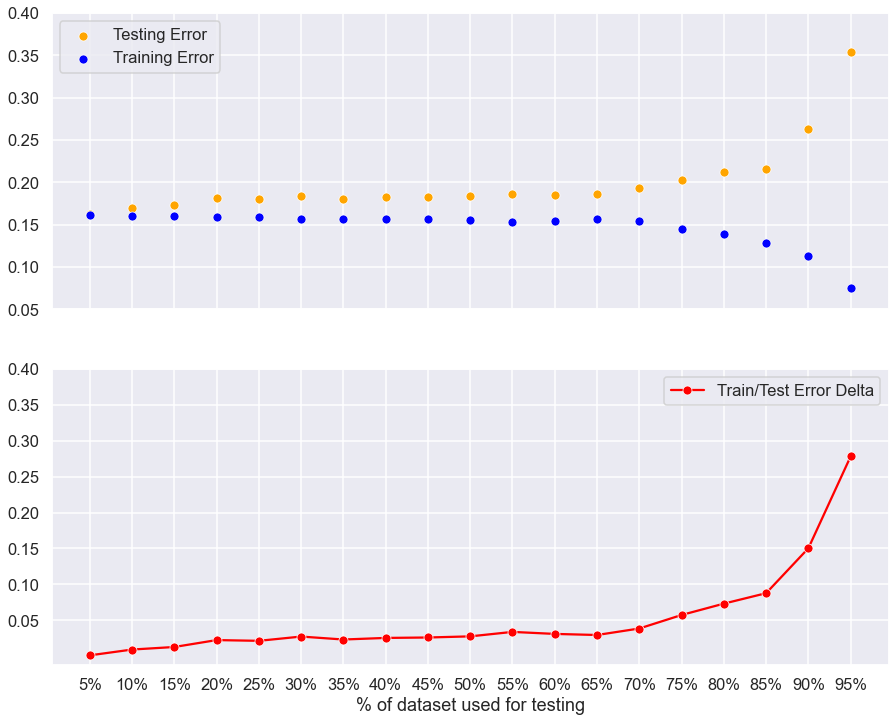

In [61]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,12), sharex=True)

sns.scatterplot(x=sizes, y=test_err, label='Testing Error', ax=ax1, color='orange')
sns.scatterplot(x=sizes, y=train_err, label='Training Error', ax=ax1, color='blue')

ax1.set_yticks(np.linspace(.05, .4, 8))

sns.lineplot(x=sizes, y=mse_deltas, marker='o', ax=ax2, label='Train/Test Error Delta', color='r')
ax2.set_yticks(np.linspace(.05, .4, 8))

plt.xticks(sizes)
plt.xlabel('% of dataset used for testing')
ax2.set_xticklabels([str(int(x*100))+'%' for x in sizes]);

What's happening here? Evaluate your result!

In [44]:
# We see basically constant error deltas from 25% to ~65%/70%, and after that
# there is a large increase - above %70, there is drastically more error when
# comparing to the (larger and larger) testing set

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.